# Pymaceuticals Inc.

#Challenge Analysis:

#Introduction:
The current challenge is related to Matplotlib. We are expected to utilize our data manipulation skills and apply whatever we have learned with regard to Matplotlib.The scenario is that I have joined Pymaceuticals,a new pharmaceutical company that specializes in anti-cancer medications.I, as a senior data analyst have been provided with complete data from the company's most recent animal study.This study basically aimed at comparing the performance of Pymaceuticals’ drug of interest, Capomulin,against other treatment regimens.The company has asked me to come up with all the figures and tables that could help with the technical report of the study and also formulate a nice summary of the study results.

#Data Description:
With regard to the dataset ,we have been provided the mouse_metadata and study_results.The mouse_metadata majorly contains details regarding the mice whereas study_results have more to do with the findings of the study.We then created a new dataframe by merging mouse_metadata and study_results so we could combine both the datasets together and use them further in our analysis.

#Methodology:
Here, in this challenge, I have made use python libraries including matplotlib, pandas, numpy and scipy.I have used various functions from time to time in the analysis for generating the required figures and tables.I have initially used pd.merge to merge the two dataframes.I have also used the nunique function to find the number of mice.I have also made use of the groupby function. Also I have used plt. functions to create different plots(box, scatter etc.).Lastly I have used scipy pearson correlation and linregress functions to find out the corelation between mouse weight and average tumor volume and create linear regression model respectively.

#Key Observations:
There was one duplicate mouse id in the dataset provided to us
The mean tumor volume for Capomulin and Ramicane is quite close to each other
Both Capomulin and Ramicane have the lowest sem (standard error on mean) (0.32)
Capomulin has the highest total number of mouse IDs/timepoints whereas the drug Propriva has the lowest 
As per the pie chart generated 51% of the mice are male whereas the rest 49% are female
The drug "Capomulin", "Ramicane" and "Ceftamin" have no outliers that means no values are lying above or below the upper and lower boundary respectively however Infubinol has potential outliers ( 31    36.321346) hence we need to get rid of these outliers to make our study more meaningful.
The line graph for capomulin treatment of mouse id l509 against timor volume is more of or a series of up and down slopes or oscillations. These oscillations might reflect fluctuations in mouse responses during different stages of the treatment, including treatment initiation, adaptation, and follow-up.
The correlation between mouse weight and tumor volume is 0.84 which is close to 1 hence we may deduce that as the mouse's weight increases the total volume for the mouse might also increase.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results , mouse_metadata,  how="left" , on='Mouse ID')   

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count = combined_data['Mouse ID'].nunique()
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Check for duplicate rows based on both "Mouse ID" and "Timepoint"
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique IDs of the duplicate mice
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids) == False]
duplicate_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids) == False]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = cleaned_data['Mouse ID'].nunique()
unique_mice_count_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={'mean' : 'Mean Tumor Volume',
                                             'median' : 'Median Tumor Volume',
                                             'var' : 'Tumor Volume Variance',
                                             'std' : 'Tumor Volume Std. Dev.',
                                             'sem' : 'Tumor Volume Std. Err.'})

#Display the Summary Statisics
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Check which method is used

# Define the aggregation dictionary
agg_dict = {
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', lambda x: np.std(x, ddof=0) / np.sqrt(len(x))]
}

# Group the data by 'Drug Regimen' and apply the aggregation using the defined dictionary
summary_statistics = cleaned_data.groupby('Drug Regimen').agg(agg_dict)

# Rename the columns for clarity
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Print the summary statistics table
#print(summary_statistics)


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean=np.mean,
    Median=np.median,
    Variance=np.var,
    Std_Deviation=np.std,
    SEM=lambda x: np.std(x, ddof=0) / np.sqrt(len(x))  # SEM = std / sqrt(n)
)

summary_statistics

,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


## Bar and Pie Charts

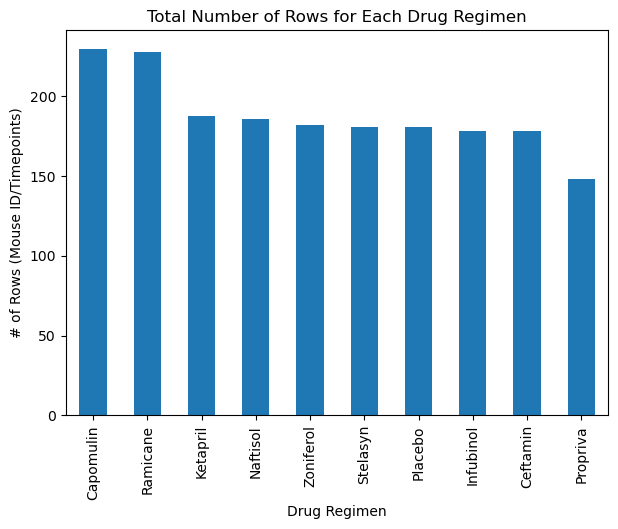

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by 'Drug Regimen' 
#Count the number of rows in each group
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using DataFrame.plot
regimen_counts.plot(kind='bar', x='Drug Regimen', y='Count', legend=False, alpha=1.0, figsize=(7, 5))

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

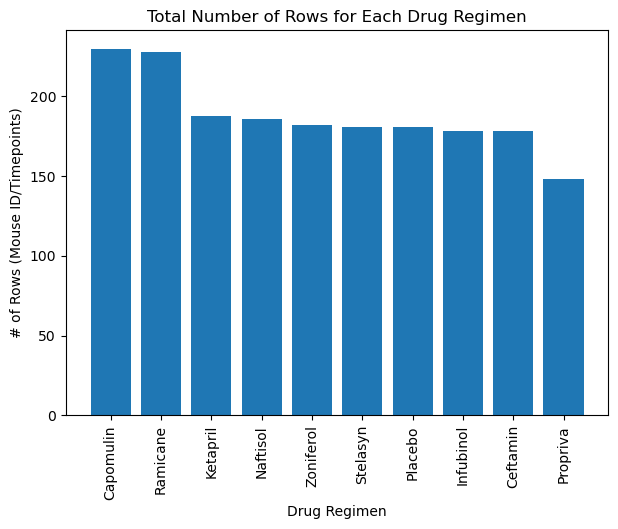

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by Drug Regimen.
# Count the number of rows in each group
regimen_counts = cleaned_data['Drug Regimen'].value_counts()


# Create a bar plot using pyplot
plt.figure(figsize=(7, 5))
plt.bar(regimen_counts.index.values, regimen_counts.values, alpha=1.0)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

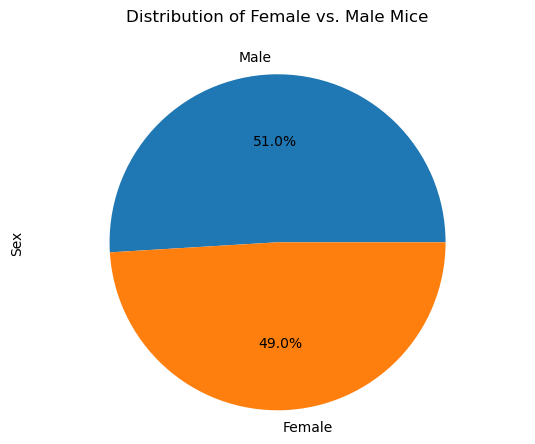

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of female and male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Female vs. Male Mice', pad=26)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

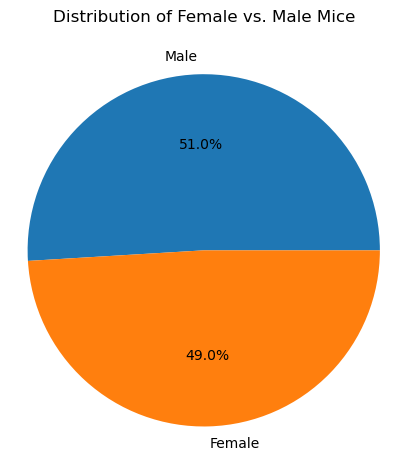

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of female and male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Create labels for the pie chart
labels = gender_counts.index.tolist()

# Create data for the pie chart
sizes = gender_counts.values.tolist()

# Create a pie plot using pyplot
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set title
plt.title('Distribution of Female vs. Male Mice', pad=26)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Create a DataFrame with Mouse ID and the corresponding last timepoint
#last_timepoint_df = pd.DataFrame({'Timepoint': last_timepoint}).reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, cleaned_data,  on=['Mouse ID', 'Timepoint'], how='left')

# Filter the rows where Timepoint matches the last timepoint
#final_tumor_volume_df = merged_df[merged_df['Timepoint'] == merged_df['Last Timepoint']]

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment regimen
for regimen in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = merged_df[merged_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(regimen_data)
    
    
    
    # Determine outliers using upper and lower bounds

    # Calculate the IQR (Interquartile Range) for the current regimen
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers for the current regimen
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    print(f"{regimen}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


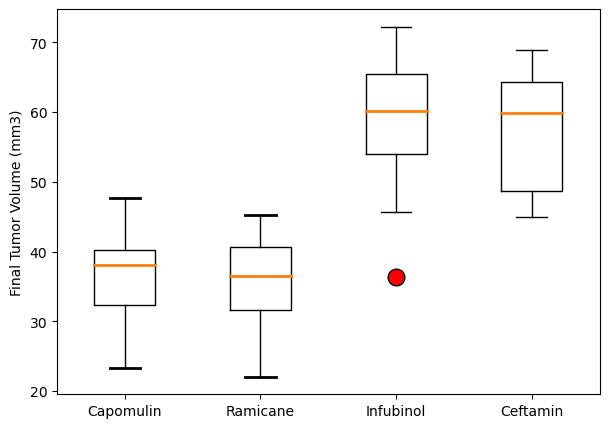

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a box plot
plt.figure(figsize=(7, 5))

# Customize the appearance of the outliers (filled red circles)
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

# Create boxplot with black outlines and orange lines inside the boxes
boxes = plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops=flierprops)

# Customize the box colors and line colors
box_colors = ['orange', 'orange', 'orange', 'orange']  # Orange fill color for boxes
line_colors = ['black', 'black', 'black', 'black']  # Black line color for boxes

for whisker, median, cap in zip(boxes['whiskers'], boxes['medians'], boxes['caps']):
    whisker.set( linestyle='-')  # Set whisker color to black
    median.set( linewidth=2)  # Set median line color to black
    cap.set( linewidth=2)  # Set cap color to black

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

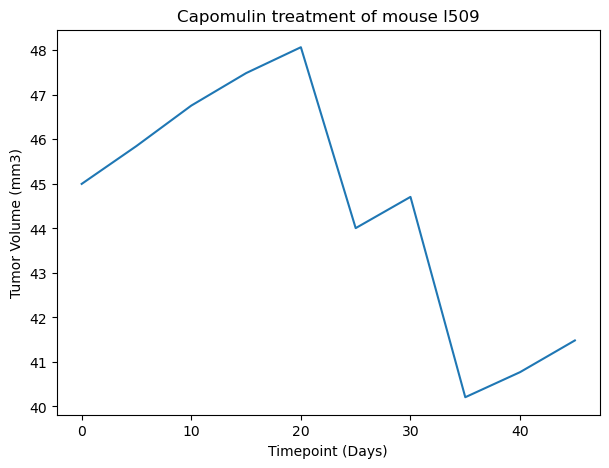

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choosing a specific mouse (e.g., 'mouse_id') treated with Capomulin
mouse_id = 'l509'

# Filtering the DataFrame for the selected mouse and Capomulin treatment
capomulin_data = combined_data[(combined_data['Mouse ID'] == mouse_id) & (combined_data['Drug Regimen'] == 'Capomulin')]

# Creating a line plot
plt.figure(figsize=(7, 5))

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


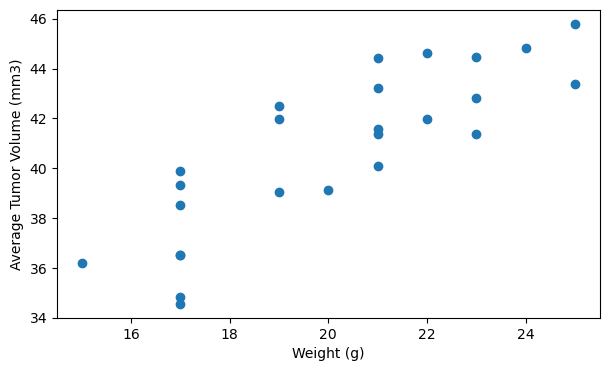

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filtering the DataFrame to include only mice treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculating the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Getting the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])  # Assuming the weight is the same for each mouse during the regimen

# Creating a scatter plot
plt.figure(figsize=(7, 4))
plt.scatter(mouse_weights, average_tumor_volume, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


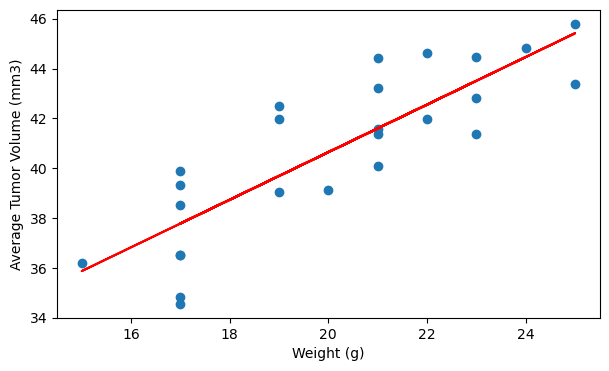

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating the correlation coefficient and p-value
correlation_coefficient, p_value = st.pearsonr(mouse_weights, average_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Calculating linear regression parameters (slope and intercept)
slope, intercept, _, _, _ = st.linregress(mouse_weights, average_tumor_volume)

# Creating a scatter plot
plt.figure(figsize=(7, 4))
plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights, slope * np.array(mouse_weights) + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()
